# 모형 최적화
- validation_curve : 단일 파라미터 최적화
- GridSearchCV : 그리드를 사용하여 복수의 파라미터 최적화
- ParameterGrid : 복수 파라미터 최적화용 그리드

## validation curve
- cv의 결과로 반환되는 train_score_mean, test_score_mean의 그래프에 각각 std값을 +, - 하면 더 구체적으로 나타낼 수 있다.
- plt.fill_between(param_range, train_mean - train_std, test_mean - test_std, alpha=0.2, color="g") 
- 다른 그리드 서치에서도 사용할 수 있다. 
- from sklearn.model_selection import validation_curve
- train_score, test_score 값을 반환한다. 
- parameter
   - param_name
   - param_range
   - scoring
   - cv
   
## GridSearchCV
- 클래스 객체에 fit 메서드를 호출하면 grid search를 사용해서 복수의 내부 모형을 생성한 후 이를 모두 실행시켜서 최적의 파라미터를 찾아준다. 
- from sklearn.model_selection import GridSearchCV
- 속성
   - grid_scores_ : param_grid의 모든 파라미터 조합에 대한 성능 결과. 
      - parameters
      - mean_validation_score : 교차 검증 결과 평균값
      - cv_validation_scores : 모든 교차 검증 결과
   - best_score_ : 최고 점수
   - best_params_ : 최고 점수를 낸 파라미터 조합
   - best_estimator_ : 최고 점수를 낸 파라미터를 가진 모형
   
## ParameterGrid
- 파라미터들을 조합하여 탐색 그리드를 생성해준다.
- GridSearchCV의 방법외에 그리드 탐색이 필요한 경우 사용
- GridSearchCV로 조합을 만들 수 없는 파라미터의 조합에 대한 테스트를 할 수 있다. 
   - list(ParameterGrid(param_grid))

## sklearn docs : hyper parameter tunning 
- 하이퍼 파라미터는 모형에서 학습되지 않는다. 
- GridSearchCV와 RandomizedSearchCV 가 있다.
   - GridSearchCV는 모든 매개변수 조합을 찾는다.
   - RandomizedSearchCV는 지정된 분포(distribution)를 가진 매개변수 공간에서의 조합을 찾는다.
- 연속반감기 CV
   - HalvingGridSearchCV, HalvingRandomoizedSearchCV
   - 실험 회차별 데이터 샘플의 수가 증가하고, 상위성능 절반이 후보(parameter 조합)가 되어 점점 줄어드는 방식
   - n_iterations_, n_candidates_, n_resources_
- GCV에 새로운 성능지표를 설정하고 여러 지표를 하나의 플롯에 나타내기
   - 성능지표의 이름을 저장한 dict 만들고, GCV의 refit, scoring 파라미터에 설정
   - 다양한 성능지표를 GCV에 설정하고 계산할 수 있다. 
   - 같은 계열로 RandomizedSearchCV도 있다. parameter sample을 특정 분포로 설정 할 수 있다. 
   - https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html#sphx-glr-auto-examples-model-selection-plot-multi-metric-evaluation-py
- Cross Validation 의 iterators 도 여러가지 종류가 있음
   - KFold, GroupKFold, StratifiedGroupKFold, StratifiedKFold, LPO, LOO, RepeatedKFold
   - https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html
   
### 중첩 CV 방법 : nested, non-nested CV 방법의 성능 비교 
- GCV만 사용하면 과최적화가 발생하여 성능이 과도하게 좋을 수 있다.
- nested CV 방법을 사용하여 GCV를 한번더 CV해주면 과최적화를 방지할 수있다. 
   - KFold 를 사용하여 inner_cv와 outer_cv로 나누어 GCV와 CV의 cv 파라미터로 사용
   - random_state 값을 달리하여 훈련 데이터 샘플을 여러형태로 분할하게 한다. 
- outer_cv에서 분할된 학습-검증 데이터 세트가 inner_cv에서 한번 더 분할 된다. 
- 이것을 그래프로 나타낸 후 어떤 모델을 선택할지 판단의 근거로 사용할 수 있다. 
   - score가 높고 차이가 나지 않는 random_state의 모델
   - https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html#sphx-glr-auto-examples-model-selection-plot-nested-cross-validation-iris-py

### GSCV 추정기의 하이퍼파라미터 셋팅하기
- hyper-parameter는 추정기(model)의 내부의 직접적인 모수가 아니다.
- hyper-parameter는추정기 클래스 생성자의 argument로 전달 된다. 
   - support vector classifier의 C, kernel, gamma, degree
   - decision Tree classifier의 max_depth, min_samples_split, min_samples_leaf 등 이 있다. 
- best cv score를 위해 hyper-parameter space를 서치하는 것이 권장된다.
- 추정기에 사용 된 hyper-parameter 찾기
   - estimator.get_params()
- 아래와 같은 방법으로 search
   - 추정기 (estimator)
   - 모수 공간 (parameter space)
   - 후보자 샘플링, 검색 방법
   - 교차 검증 방식과 점수 함수
- scikit-learn의 모수 검색 방법 2가지 
   - GridSearchCV : 모든 매개변수의 조합을 고려하는 CV
   - RandomizedSearchCV : 구체적인 분포(dist)를 사용하여 매개변수 공간의 후보들을 샘플링하는 CV
   - HalvingGridSearchCV, HalvingRandomSearchCV : GSCV와, RSCV를 보완하는 빠른 CV
- 모델의 예측에 크게 영향을 끼치는 parameter 들을 search 할때, 다른 paramter는 기본값으로 설정하는 것이 일반적이다.
   - 추정기의 docstring 을 참고하여 추정기의 hyper-parameter 들에 대해서 알 수 있다.
- GSCV
   - param_grid를 설정하여 hyper_parameter를 설정한 후 조합을 만들 수 있다.
   - fitting을 하면 매개변수의 조합이 데이터 세트에 적용되고 최상의 조합을 찾는다.
- 참고
   - https://scikit-learn.org/stable/modules/grid_search.html#grid-search
   - GSCV를 사용하는 방법들 (전부 완료)
      - custom refit param : https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py
      - Nested, Non-Nested CV : https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html#sphx-glr-auto-examples-model-selection-plot-nested-cross-validation-iris-py
      - multi-metric eval CV, GSCV : https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html#sphx-glr-auto-examples-model-selection-plot-multi-metric-evaluation-py
      - balance model and CV score : https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_refit_callable.html#sphx-glr-auto-examples-model-selection-plot-grid-search-refit-callable-py
      - statical comparison of model : https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_stats.html#sphx-glr-auto-examples-model-selection-plot-grid-search-stats-py

### RSCV 추정기의 하이퍼파라미터 셋팅하기
- RSCV
   - GSCV가 일반적으로 사용된다.
   - RSCV는 매개변수의 값에 대한 분포에서 설정가능한 매개변수를 무작위로 구한다.
   - 두가지 장점이 있다.
      - 성능에 영향이 없는 매개변수가 추가되어도 효율성이 감소되지 않는다.
      - 파라미터의 수나 가능한 값들에 독립적으로 budget을 선택할 수 있다.
   - n_iter(반복횟수)를 늘리면 budget을 계산할 수 있다. 
      - 즉 파라미터의 샘플을 늘리면
   - GSCV의 param_grid 형식과 같지만, 각 파라미터의 값으로 dist를 사용할 수 있다. 
      - 연속확률분포를 사용하여 파라미터의 샘플 범위를 지정하면 더 정밀한 샘플들을 생성할 수 있다. 
- GSCV와 RSCV 비교
   - RSCV는 hyper-parameter의 샘플을 특정한 분포(distribution)에서 샘플링할 수 있다. 따라서 연속적이고 갯수가 많다.
      - 모든 파라미터의 조합을 사용하여 훈련함
   - GSCV는 hyper-parameter의 샘플을 특정한 값에서 샘플링하고 반드시 연속적인 것은 아니다.
      - 모든 파라미터의 조합을 사용하여 훈련함
   - RSCV가 GSCV보다 성능이 낮지만 훈련 시간이 상대적으로 빠르다.
- 참고
   - https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html#sphx-glr-auto-examples-model-selection-plot-randomized-search-py

### 연속적인 반감기를 사용하는 HalvingCV 로 최적의 매개변수 검색
- 연속 반감기를 사용하는 CV
   - HalvingGridSearchCV, HalvingRandomizedSearchCV
   - 아직 실험단계인 CV라서 API 지원이 중단 될 수 있다.
- 연속반감기 Successive Halving(SH)는 후보 매개변수 조합간의 토너먼트와 같다.
   - 좋은 성능 절반만 남아 다음 실험에 사용된다.
- 처음 훈련에서 최소의 자원 Resource (데이터 샘플 수)을 사용하여 모든 후보(매개변수 조합)를 평가하고, 다음 훈련에서 샘플의 수가 늘어나지만 이전 후보에서 일부만 선택되어 다음 훈련으로 넘어간다.
   - 여기서 자원은 Resource로 샘플 수 이지만, n_estimator 같이 추정기의 갯수가 될 수 도 있다.
- 각 훈련에서 성능이 좋은 후보(매개변수 조합, params)가 다음 훈련에 사용된다.
   - 상위 절반만 남는다.
   - 최종 2개의 모델만 남는다.
- 즉 실험이 진행될 수록 훈련 데이터 샘플의 수가 늘어나고, 좋은 성능 절반만 남아 최종 2개의 모델이 남는다.
- parameter 
   - factor (> 1) : resource의 증가 속도와 후보자 수가 감소하는 속도를 제어한다.
      - factor는 일반적으로 값 3이 쓰인다.
   - resource, min_resource, factor는 매개변수의 검색을 제어하는 중요한 parameter
- 참고
   - https://scikit-learn.org/stable/auto_examples/model_selection/plot_successive_halving_iterations.html
- 하이퍼파라미터 튜닝에 관한 여러가지 방법론들
   - 중첩, 비중첩 교차 검증 : gridCV를 다시한번 cross_val_score로 실행하기
      - https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html#sphx-glr-auto-examples-model-selection-plot-nested-cross-validation-iris-py
   - cv 와 gridcv의 다중 측정항목을 나타내기 : 여러 반환값을 시각화
      - https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html#sphx-glr-auto-examples-model-selection-plot-multi-metric-evaluation-py
   - 모델 복잡성과 교차검증 점수의 균형 맞추기 : 
      - https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_refit_callable.html#sphx-glr-auto-examples-model-selection-plot-grid-search-refit-callable-py
   - 그리드 모델의 통계적 비교
      - https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_stats.html#sphx-glr-auto-examples-model-selection-plot-grid-search-stats-py


## validation curve
- parameter
    - param_name
    - param_range
    - scoring

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import validation_curve
from sklearn.svm import SVC

In [3]:
digits = load_digits()
X, y = digits.data, digits.target

In [4]:
X.shape, y.shape

((1797, 64), (1797,))

In [6]:
param_range = np.logspace(-6, -1, 10)
param_range

array([1.00000000e-06, 3.59381366e-06, 1.29154967e-05, 4.64158883e-05,
       1.66810054e-04, 5.99484250e-04, 2.15443469e-03, 7.74263683e-03,
       2.78255940e-02, 1.00000000e-01])

In [9]:
param_range[0]

1e-06

In [22]:
%%time
train_scores, test_scores = \
    validation_curve(SVC(), X, y, 
                     param_name="gamma", param_range=param_range, cv=10, 
                     scoring="accuracy", n_jobs=1)

CPU times: total: 44.3 s
Wall time: 46.9 s


In [23]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

In [30]:
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

In [31]:
train_scores_mean

array([0.13836306, 0.72045751, 0.93439655, 0.96939318, 0.98775736,
       0.99789765, 1.        , 1.        , 1.        , 1.        ])

In [32]:
train_scores_std

array([0.06061766, 0.01032486, 0.00377997, 0.00261459, 0.00102754,
       0.00056702, 0.        , 0.        , 0.        , 0.        ])

In [35]:
%matplotlib inline

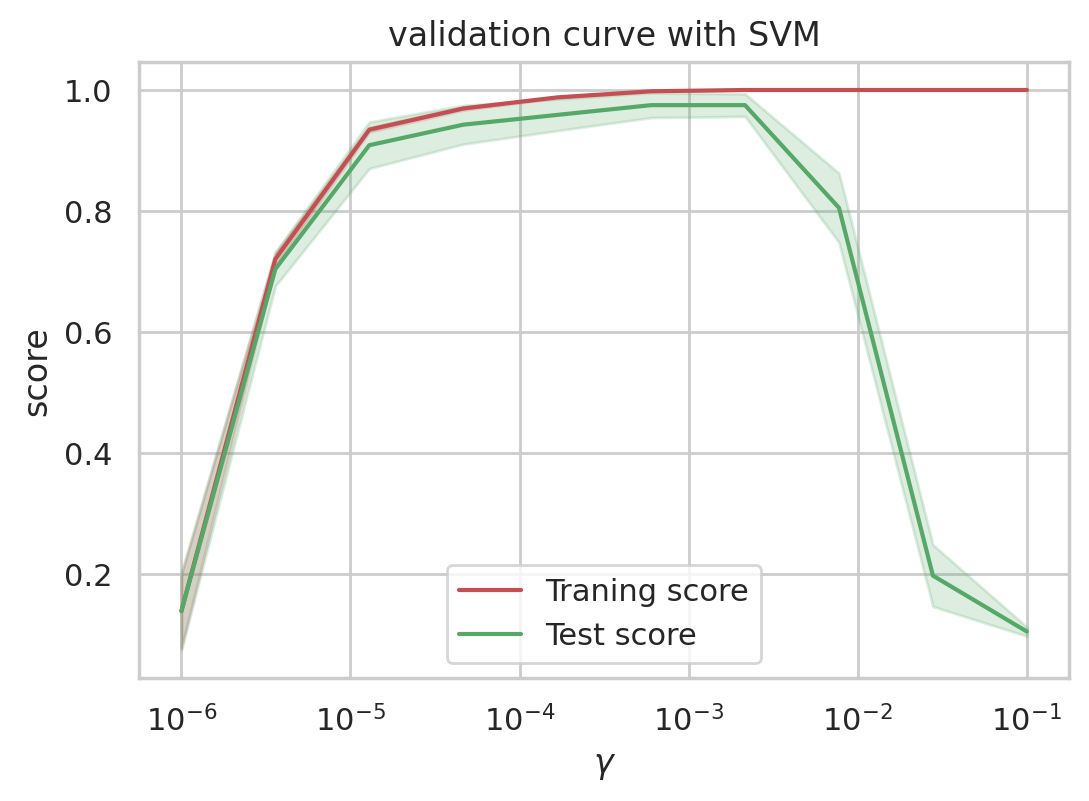

In [39]:
# xticks의 - 자승 표시 font
plt.rcParams["font.family"] = "DejaVu Sans"

plt.semilogx(param_range, train_scores_mean, label="Traning score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2, color="r")

plt.semilogx(param_range, test_scores_mean, label="Test score", color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std, 
                test_scores_mean + test_scores_std, alpha=0.2, color="g")

plt.legend(loc="best")
plt.xlabel("$\gamma$")
plt.ylabel("score")
plt.title("validation curve with SVM")

plt.show() ; 

## GridSearchCV
- 

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [42]:
pipe_svc = Pipeline([("scaler", StandardScaler()), ("clf", SVC(random_state=1))])
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [
    {"clf__C": param_range, "clf__kernel": ["linear"]},
    {"clf__C": param_range, "clf__gamma": param_range, "clf__kernel": ["rbf"]}]
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid,
                 scoring="accuracy", cv=10, n_jobs=1)

%time gs = gs.fit(X, y)

CPU times: total: 2min 54s
Wall time: 3min 13s


In [43]:
pd.DataFrame(gs.cv_results_).sort_values("rank_test_score", ascending=True)[:10]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__C,param_clf__kernel,param_clf__gamma,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
66,0.049465,0.000654,0.015762,0.001164,1000.0,rbf,0.01,"{'clf__C': 1000.0, 'clf__gamma': 0.01, 'clf__k...",0.933333,0.994444,...,0.955556,0.988889,0.977778,0.977778,0.949721,0.972067,0.960894,0.969379,0.018168,1
58,0.050631,0.001441,0.015894,0.000712,100.0,rbf,0.01,"{'clf__C': 100.0, 'clf__gamma': 0.01, 'clf__ke...",0.933333,0.994444,...,0.955556,0.988889,0.977778,0.977778,0.949721,0.972067,0.960894,0.969379,0.018168,1
50,0.051861,0.000772,0.016757,0.000869,10.0,rbf,0.01,"{'clf__C': 10.0, 'clf__gamma': 0.01, 'clf__ker...",0.933333,0.994444,...,0.955556,0.988889,0.977778,0.977778,0.949721,0.972067,0.960894,0.969379,0.018168,1
57,0.036404,0.001201,0.011470,0.000500,100.0,rbf,0.001,"{'clf__C': 100.0, 'clf__gamma': 0.001, 'clf__k...",0.922222,0.994444,...,0.955556,0.977778,0.972222,0.972222,0.960894,0.932961,0.966480,0.960478,0.020297,4
42,0.055748,0.001446,0.018051,0.000533,1.0,rbf,0.01,"{'clf__C': 1.0, 'clf__gamma': 0.01, 'clf__kern...",0.944444,0.994444,...,0.911111,0.983333,0.972222,0.972222,0.949721,0.960894,0.949721,0.960478,0.022172,4
65,0.035406,0.000920,0.011568,0.000487,1000.0,rbf,0.001,"{'clf__C': 1000.0, 'clf__gamma': 0.001, 'clf__...",0.916667,0.994444,...,0.961111,0.972222,0.972222,0.977778,0.960894,0.927374,0.955307,0.959358,0.021870,6
64,0.034911,0.000011,0.010667,0.000631,1000.0,rbf,0.0001,"{'clf__C': 1000.0, 'clf__gamma': 0.0001, 'clf_...",0.922222,0.988889,...,0.938889,0.972222,0.972222,0.983333,0.983240,0.932961,0.949721,0.958259,0.023115,7
7,0.028623,0.000639,0.003690,0.000457,1000.0,linear,NaN,"{'clf__C': 1000.0, 'clf__kernel': 'linear'}",0.911111,0.988889,...,0.938889,0.966667,0.966667,0.988889,0.977654,0.938547,0.944134,0.956589,0.023965,8
5,0.031317,0.001551,0.004187,0.000743,10.0,linear,NaN,"{'clf__C': 10.0, 'clf__kernel': 'linear'}",0.911111,0.988889,...,0.938889,0.966667,0.966667,0.988889,0.977654,0.938547,0.944134,0.956589,0.023965,8
4,0.030116,0.000401,0.003794,0.000401,1.0,linear,NaN,"{'clf__C': 1.0, 'clf__kernel': 'linear'}",0.911111,0.988889,...,0.938889,0.966667,0.966667,0.988889,0.977654,0.938547,0.944134,0.956589,0.023965,8


In [47]:
gs.cv_results_["mean_test_score"]

array([0.23120112, 0.91485413, 0.95046245, 0.95547176, 0.95658908,
       0.95658908, 0.95658908, 0.95658908, 0.13089385, 0.13536313,
       0.13927374, 0.12418994, 0.1001676 , 0.13089385, 0.10687151,
       0.1001676 , 0.13089385, 0.13536313, 0.13927374, 0.12418994,
       0.1001676 , 0.13089385, 0.10687151, 0.1001676 , 0.13089385,
       0.13536313, 0.14429857, 0.12418994, 0.1001676 , 0.13089385,
       0.10687151, 0.1001676 , 0.13089385, 0.68335816, 0.90761639,
       0.40958101, 0.1001676 , 0.13089385, 0.10687151, 0.1001676 ,
       0.70449721, 0.93153011, 0.96047796, 0.90317505, 0.12469894,
       0.1001676 , 0.10128492, 0.1001676 , 0.93264742, 0.95547176,
       0.96937927, 0.90540348, 0.13416511, 0.1001676 , 0.10128492,
       0.1001676 , 0.95547796, 0.96047796, 0.96937927, 0.90540348,
       0.13416511, 0.1001676 , 0.10128492, 0.1001676 , 0.95825885,
       0.95935754, 0.96937927, 0.90540348, 0.13416511, 0.1001676 ,
       0.10128492, 0.1001676 ])

In [48]:
gs.best_score_

0.969379267535692

In [49]:
gs.best_params_

{'clf__C': 10.0, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}

In [50]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', SVC(C=10.0, gamma=0.01, random_state=1))])

## ParameterGrid

In [51]:
from sklearn.model_selection import ParameterGrid

In [53]:
param_grid = {"a": [1, 2], "b": [True, False]}

list(ParameterGrid(param_grid))

[{'a': 1, 'b': True},
 {'a': 1, 'b': False},
 {'a': 2, 'b': True},
 {'a': 2, 'b': False}]

In [54]:
param_grid = [{"kernel": ["linear"]}, {"kernel": ["rbf"], "gamma": [1, 5]}]

list(ParameterGrid(param_grid))

[{'kernel': 'linear'},
 {'gamma': 1, 'kernel': 'rbf'},
 {'gamma': 5, 'kernel': 'rbf'}]

In [56]:
param_grid = [{"kernel": ["linear", "rbf", "poly", "sigmoid"], 
              "gamma": [0.01, 0.1, 1, 10, 100],
              "C": [0.01, 0.1, 1, 10, 100],
              "decision_fuction_shape": ["ovo", "ovr"]}]

len(list(ParameterGrid(param_grid)))

200

## 병렬처리
- GridSearchCV의 n_jobs 파라미터
   - CPU 코어수를 설정하여 멀티 프로세스를 사용하는 방식

In [60]:
param_grid = {"gamma": np.logspace(-6, -1, 10)}
gs1 = GridSearchCV(estimator=SVC(), param_grid=param_grid,
                  cv=5, scoring="accuracy", n_jobs=1)
gs2 = GridSearchCV(estimator=SVC(), param_grid=param_grid,
                  cv=5, scoring="accuracy", n_jobs=2)

In [61]:
%%time
gs1.fit(X, y)

CPU times: total: 9.44 s
Wall time: 9.53 s


GridSearchCV(cv=5, estimator=SVC(), n_jobs=1,
             param_grid={'gamma': array([1.00000000e-06, 3.59381366e-06, 1.29154967e-05, 4.64158883e-05,
       1.66810054e-04, 5.99484250e-04, 2.15443469e-03, 7.74263683e-03,
       2.78255940e-02, 1.00000000e-01])},
             scoring='accuracy')

In [63]:
%%time
gs2.fit(X, y)

CPU times: total: 46.9 ms
Wall time: 5.17 s


GridSearchCV(cv=5, estimator=SVC(), n_jobs=2,
             param_grid={'gamma': array([1.00000000e-06, 3.59381366e-06, 1.29154967e-05, 4.64158883e-05,
       1.66810054e-04, 5.99484250e-04, 2.15443469e-03, 7.74263683e-03,
       2.78255940e-02, 1.00000000e-01])},
             scoring='accuracy')

In [65]:
gs3 = GridSearchCV(estimator=SVC(), param_grid=param_grid,
                  cv=5, scoring="accuracy", n_jobs=3)

In [66]:
%%time
gs3.fit(X, y)

CPU times: total: 78.1 ms
Wall time: 5.27 s


GridSearchCV(cv=5, estimator=SVC(), n_jobs=3,
             param_grid={'gamma': array([1.00000000e-06, 3.59381366e-06, 1.29154967e-05, 4.64158883e-05,
       1.66810054e-04, 5.99484250e-04, 2.15443469e-03, 7.74263683e-03,
       2.78255940e-02, 1.00000000e-01])},
             scoring='accuracy')

## cross_val_score, GridSearchCV의 다중 측정 항목
- 여러가지 반환값들을 그래프로 나타내기

In [1]:
from sklearn.datasets import make_hastie_10_2
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [2]:
X, y = make_hastie_10_2(n_samples=8000, random_state=42)

In [3]:
X.shape, y.shape

((8000, 10), (8000,))

In [5]:
X[:5]

array([[ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
        -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004],
       [-0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
        -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ],
       [ 1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
         0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375],
       [-0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
        -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124],
       [ 0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
        -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016]])

In [6]:
y[:5]

array([-1.,  1., -1.,  1., -1.])

In [7]:
np.unique(y, return_counts=True)

(array([-1.,  1.]), array([3966, 4034], dtype=int64))

### make_scorer
- 성능 지표나 손실 함수로부터 점수 지표를 만든다.
- 이것을 GridCV에 적용할 수 있다. 

In [8]:
scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)}
scoring

{'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

In [10]:
help(make_scorer)

Help on function make_scorer in module sklearn.metrics._scorer:

make_scorer(score_func, *, greater_is_better=True, needs_proba=False, needs_threshold=False, **kwargs)
    Make a scorer from a performance metric or loss function.
    
    This factory function wraps scoring functions for use in
    :class:`~sklearn.model_selection.GridSearchCV` and
    :func:`~sklearn.model_selection.cross_val_score`.
    It takes a score function, such as :func:`~sklearn.metrics.accuracy_score`,
    :func:`~sklearn.metrics.mean_squared_error`,
    :func:`~sklearn.metrics.adjusted_rand_score` or
    :func:`~sklearn.metrics.average_precision_score`
    and returns a callable that scores an estimator's output.
    The signature of the call is `(estimator, X, y)` where `estimator`
    is the model to be evaluated, `X` is the data and `y` is the
    ground truth labeling (or `None` in the case of unsupervised models).
    
    Read more in the :ref:`User Guide <scoring>`.
    
    Parameters
    ----------

### GridSearchCV의 refit 파라미터
- refit="AUC"
   - train, test 데이터 세트에 cv를 적용한 AUC 값을 반환한다.
   - clf.best_score_, clf.best_estimator_, clf.best_params_ 에서 가져올 수 있다.
   - 즉 새로운 평가 지표를 GridSearchCV에 추가 할 수 있다.

In [11]:
gs = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid={"min_samples_split": range(2, 403, 20)},
    scoring=scoring,
    refit="AUC",
    n_jobs=2,
    return_train_score=True
)

gs.fit(X, y)
results = gs.cv_results_

In [15]:
result_df = pd.DataFrame(results)
result_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,...,mean_test_Accuracy,std_test_Accuracy,rank_test_Accuracy,split0_train_Accuracy,split1_train_Accuracy,split2_train_Accuracy,split3_train_Accuracy,split4_train_Accuracy,mean_train_Accuracy,std_train_Accuracy
0,0.273738,0.006091,0.003779,0.001593,2,{'min_samples_split': 2},0.750681,0.781332,0.793312,0.777691,...,0.775000,0.013959,8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.275081,0.011453,0.002983,0.000007,22,{'min_samples_split': 22},0.803303,0.841271,0.839880,0.834702,...,0.789500,0.013730,4,0.933906,0.925937,0.930937,0.931250,0.926562,0.929719,0.003021
2,0.268290,0.012047,0.003184,0.000403,42,{'min_samples_split': 42},0.824982,0.849409,0.852856,0.854352,...,0.795875,0.012970,1,0.910625,0.900312,0.906250,0.908438,0.905156,0.906156,0.003474
3,0.260519,0.008586,0.002781,0.000416,62,{'min_samples_split': 62},0.839375,0.855923,0.857674,0.864427,...,0.794000,0.010137,2,0.889219,0.885938,0.891563,0.890469,0.891094,0.889656,0.002019
4,0.257281,0.018340,0.002792,0.000398,82,{'min_samples_split': 82},0.846684,0.865711,0.859966,0.870002,...,0.792750,0.010930,3,0.870625,0.867344,0.871719,0.871406,0.874531,0.871125,0.002306


#### refit 파라미터로 설정한 성능지표가 계산되어 반환된다.

In [17]:
result_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_min_samples_split', 'params', 'split0_test_AUC',
       'split1_test_AUC', 'split2_test_AUC', 'split3_test_AUC',
       'split4_test_AUC', 'mean_test_AUC', 'std_test_AUC', 'rank_test_AUC',
       'split0_train_AUC', 'split1_train_AUC', 'split2_train_AUC',
       'split3_train_AUC', 'split4_train_AUC', 'mean_train_AUC',
       'std_train_AUC', 'split0_test_Accuracy', 'split1_test_Accuracy',
       'split2_test_Accuracy', 'split3_test_Accuracy', 'split4_test_Accuracy',
       'mean_test_Accuracy', 'std_test_Accuracy', 'rank_test_Accuracy',
       'split0_train_Accuracy', 'split1_train_Accuracy',
       'split2_train_Accuracy', 'split3_train_Accuracy',
       'split4_train_Accuracy', 'mean_train_Accuracy', 'std_train_Accuracy'],
      dtype='object')

#### refit 을 사용하지 않은 경우 acc만 계산됨

In [20]:
gs_test = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid={"min_samples_split": range(2, 403, 20)},
    scoring="accuracy",
    n_jobs=2,
    return_train_score=True)

gs_test.fit(X, y)
test_df = pd.DataFrame(gs_test.cv_results_)
test_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_min_samples_split', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [144]:
gs.best_score_

0.8612498435391694

In [145]:
gs.best_params_

{'min_samples_split': 82}

In [146]:
gs.best_estimator_

DecisionTreeClassifier(min_samples_split=82, random_state=42)

### ploting results

In [23]:
results["param_min_samples_split"].data

array([2, 22, 42, 62, 82, 102, 122, 142, 162, 182, 202, 222, 242, 262,
       282, 302, 322, 342, 362, 382, 402], dtype=object)

In [24]:
X_axis = np.array(results["param_min_samples_split"].data, dtype=float)
X_axis

array([  2.,  22.,  42.,  62.,  82., 102., 122., 142., 162., 182., 202.,
       222., 242., 262., 282., 302., 322., 342., 362., 382., 402.])

In [55]:
%matplotlib inline

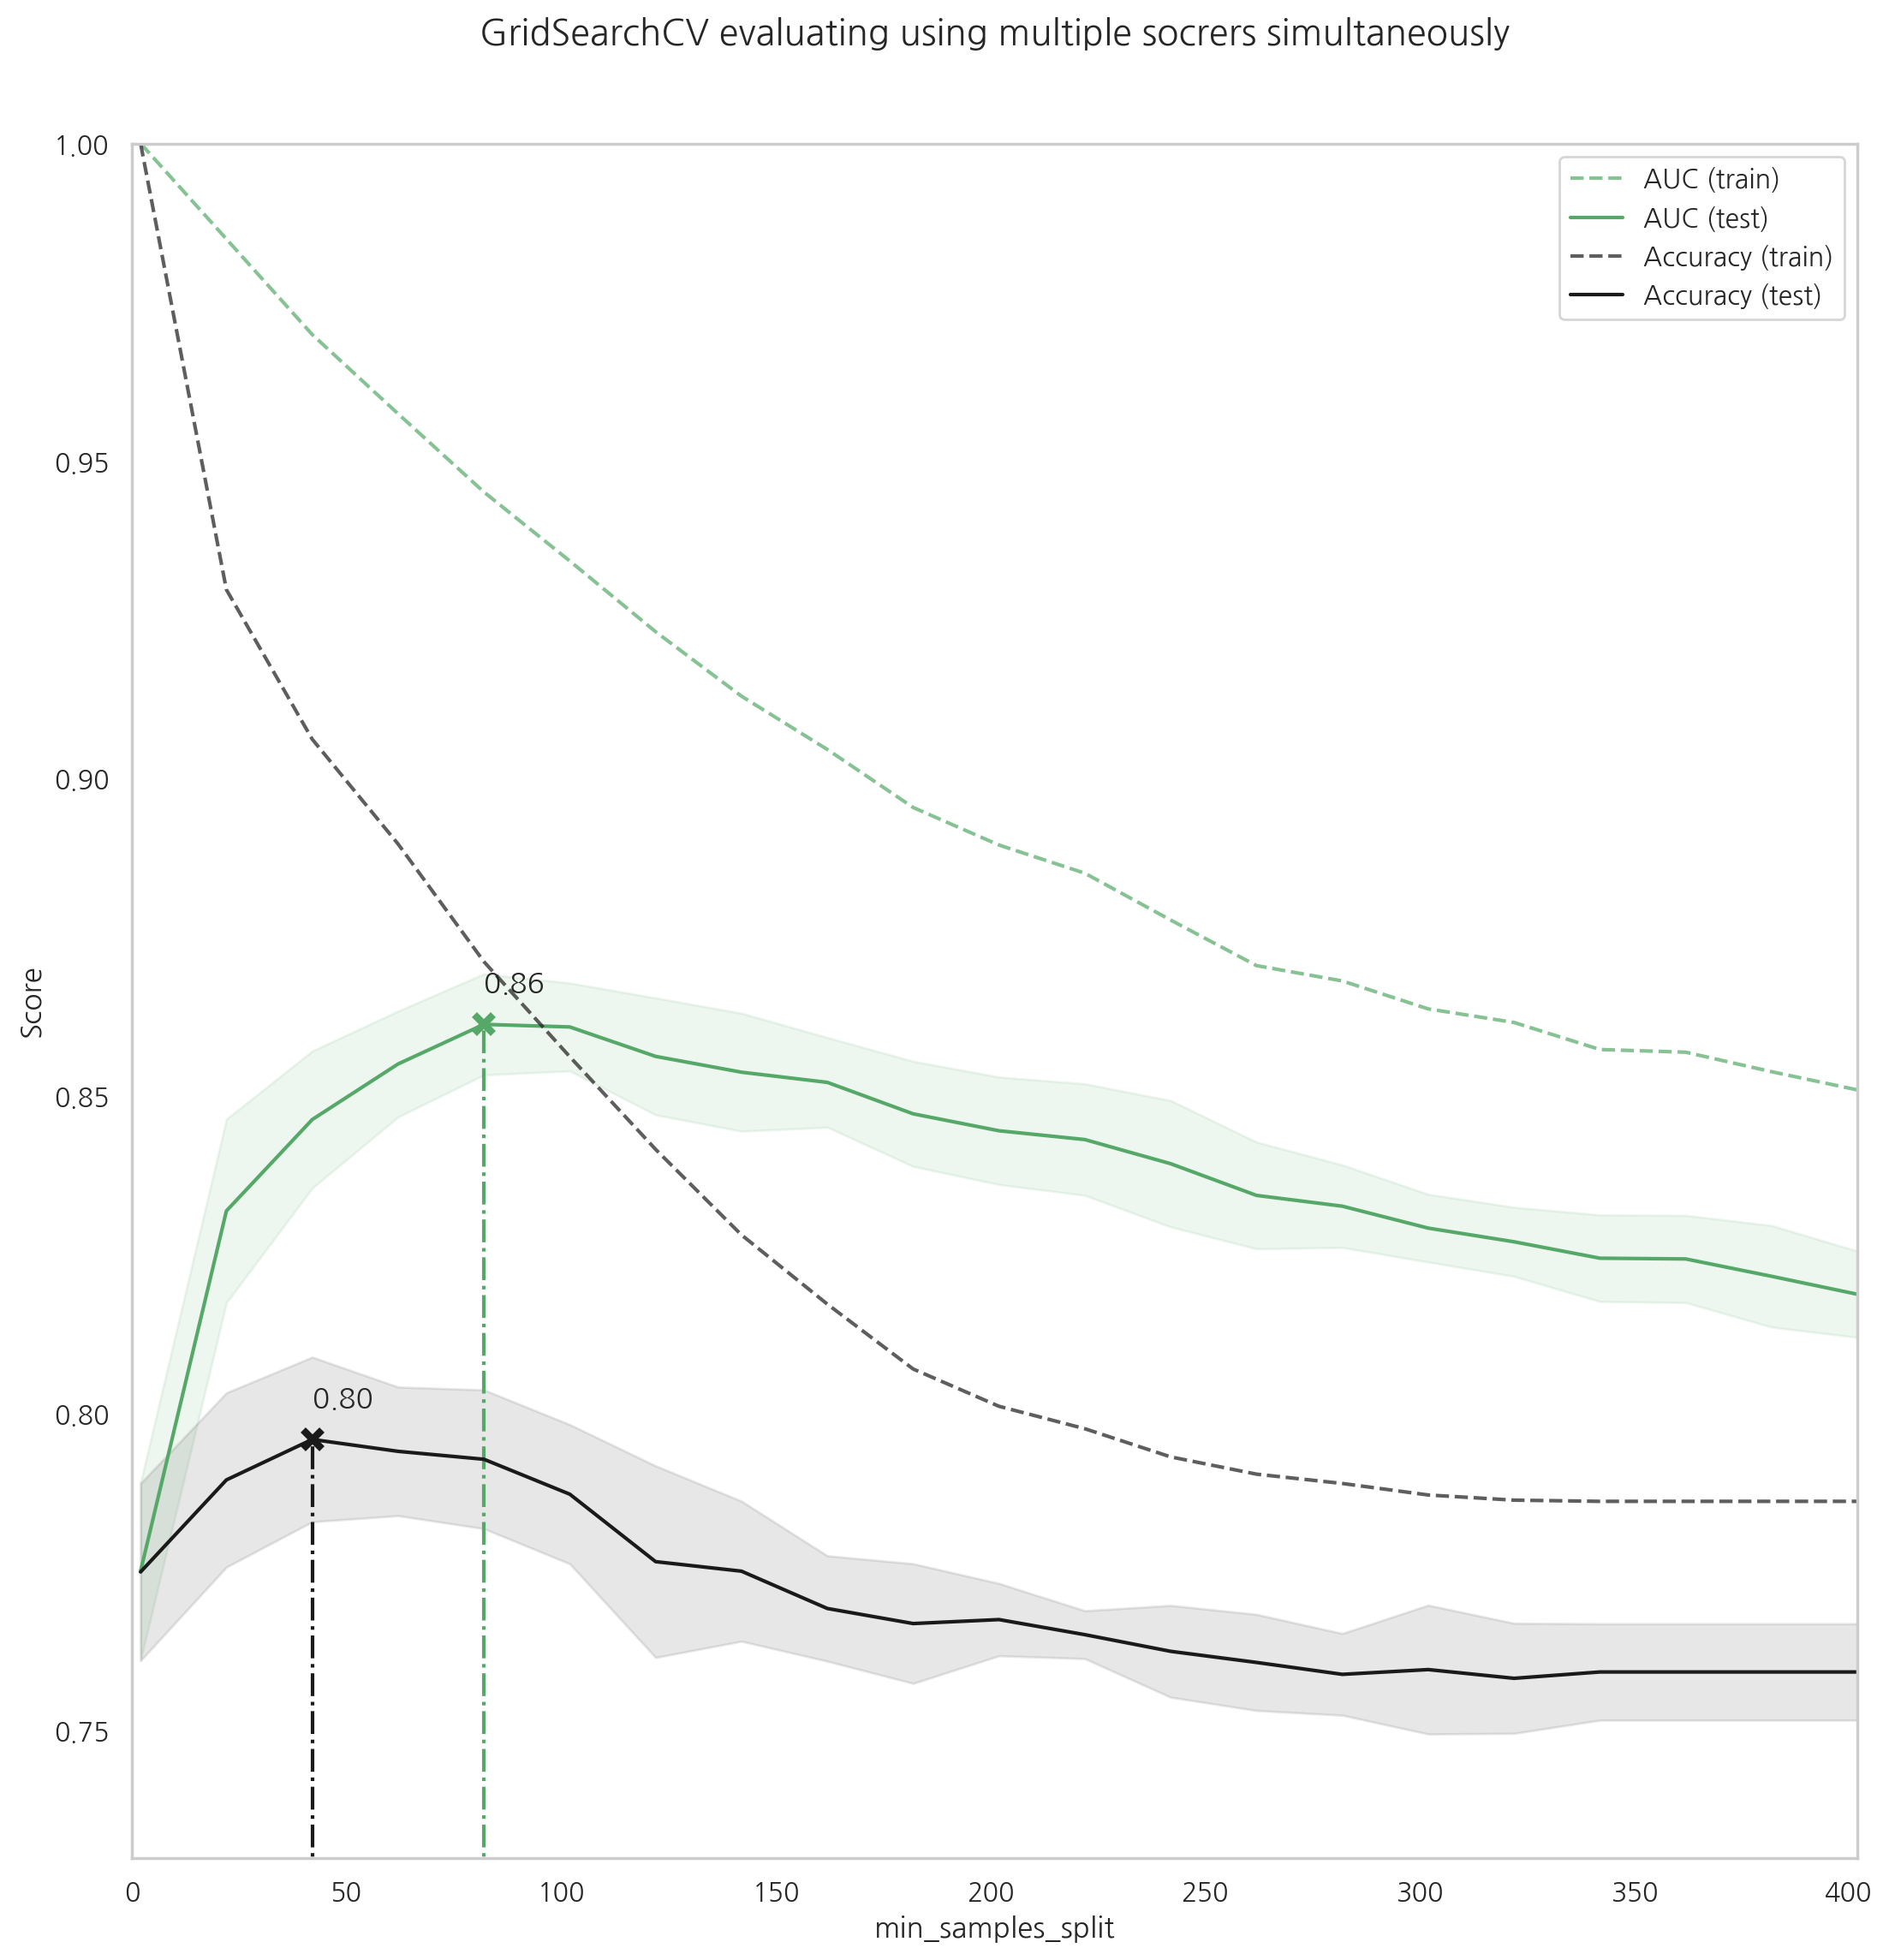

In [67]:
plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple socrers simultaneously", 
         fontsize=15, y=1.05)
plt.xlabel("min_samples_split")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0, 402)
ax.set_ylim(0.73, 1)

for scorer, color in zip(sorted(scoring), ["g", "k"]) : 
    for sample, style in (("train", "--"), ("test", "-")) :
        sample_score_mean = results["mean_%s_%s" % (sample, scorer)]
        sample_score_std = results["std_%s_%s" % (sample, scorer)]
        ax.fill_between(
            X_axis,
            sample_score_mean - sample_score_std,
            sample_score_mean + sample_score_std,
            alpha=0.1 if sample == "test" else 0, # test score에만 분산영역 표시
            color=color
        )
        ax.plot(
            X_axis,
            sample_score_mean,
            style,
            color=color,
            alpha=1 if sample == "test" else 0.7,
            label="%s (%s)" % (scorer, sample)
        )
    # test score의 best val의 위치 표시 : rank 1
    # np.nonzero() : 0이 아닌 값의 인덱스 반환
    best_index = np.nonzero(results["rank_test_%s" % scorer] == 1)[0][0]
    best_score = results["mean_test_%s" % scorer][best_index]
    
    ax.plot(
        [X_axis[best_index]] * 2, # [82.0, 82.0]
        [0, best_score],
        linestyle="-.",
        color=color,
        marker="x",
        markeredgewidth=3,
        ms=8
    )
    ax.annotate("%0.2f" % best_score, (X_axis[best_index], best_score + 0.005))
    
plt.legend(loc="best")
plt.grid(False)
plt.show() ; 

In [28]:
scoring

{'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

In [26]:
sorted(scoring)

['AUC', 'Accuracy']

In [27]:
for scorer, color in zip(sorted(scoring), ["g", "k"]) : 
    print(scorer, color)

AUC g
Accuracy k


In [60]:
results["mean_train_AUC"]

array([1.        , 0.98494245, 0.96989477, 0.95741781, 0.94509394,
       0.93423257, 0.92308868, 0.9129394 , 0.90454738, 0.89541026,
       0.88949818, 0.88505699, 0.8776788 , 0.87050212, 0.8680883 ,
       0.8636847 , 0.8615497 , 0.85728994, 0.85686386, 0.85379468,
       0.85092347])

In [66]:
[X_axis[4]] * 2

[82.0, 82.0]

### np.nonzero()
- 0이 아닌 요소의 행 인덱스와 열 인덱스를 반환해준다.

In [44]:
test_arr = np.array([[1, 0, 3], [4, 0, 6]])
test_arr

array([[1, 0, 3],
       [4, 0, 6]])

In [45]:
np.nonzero(test_arr)

(array([0, 0, 1, 1], dtype=int64), array([0, 2, 0, 2], dtype=int64))

In [40]:
help(np.nonzero)

Help on _ArrayFunctionDispatcher in module numpy:

nonzero(a)
    Return the indices of the elements that are non-zero.
    
    Returns a tuple of arrays, one for each dimension of `a`,
    containing the indices of the non-zero elements in that
    dimension. The values in `a` are always tested and returned in
    row-major, C-style order.
    
    To group the indices by element, rather than dimension, use `argwhere`,
    which returns a row for each non-zero element.
    
    .. note::
    
       When called on a zero-d array or scalar, ``nonzero(a)`` is treated
       as ``nonzero(atleast_1d(a))``.
    
       .. deprecated:: 1.17.0
    
          Use `atleast_1d` explicitly if this behavior is deliberate.
    
    Parameters
    ----------
    a : array_like
        Input array.
    
    Returns
    -------
    tuple_of_arrays : tuple
        Indices of elements that are non-zero.
    
    See Also
    --------
    flatnonzero :
        Return indices that are non-zero in the fl

#### rank 배열에서 특정 값의 인덱스
- rank 배열을 T, F로 변환한뒤
- np.nonzero()를 사용하면
- T의 인덱스를 array로 반환한다.

In [51]:
np.nonzero(results["rank_test_AUC"] == 1)[0][0]

4

#### np.argwhere()
- 0이 아닌 요소의 인덱스

In [48]:
test_arr = np.array([[1, 2, 3, 0, 5], [0, 0, 1, 2, 3]])
np.argwhere(test_arr)

array([[0, 0],
       [0, 1],
       [0, 2],
       [0, 4],
       [1, 2],
       [1, 3],
       [1, 4]], dtype=int64)

### RECALL 성능지표로 테스트

In [72]:
scoring = {"RECALL": "recall", "Accuracy": make_scorer(accuracy_score)}
scoring

{'RECALL': 'recall', 'Accuracy': make_scorer(accuracy_score)}

In [74]:
gs2 = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid={"min_samples_split": range(2, 403, 20)},
    refit="RECALL",
    scoring=scoring,
    n_jobs=2,
    return_train_score=True
)

gs2.fit(X, y)
gs2_df = pd.DataFrame(gs2.cv_results_)
gs2_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_min_samples_split', 'params', 'split0_test_RECALL',
       'split1_test_RECALL', 'split2_test_RECALL', 'split3_test_RECALL',
       'split4_test_RECALL', 'mean_test_RECALL', 'std_test_RECALL',
       'rank_test_RECALL', 'split0_train_RECALL', 'split1_train_RECALL',
       'split2_train_RECALL', 'split3_train_RECALL', 'split4_train_RECALL',
       'mean_train_RECALL', 'std_train_RECALL', 'split0_test_Accuracy',
       'split1_test_Accuracy', 'split2_test_Accuracy', 'split3_test_Accuracy',
       'split4_test_Accuracy', 'mean_test_Accuracy', 'std_test_Accuracy',
       'rank_test_Accuracy', 'split0_train_Accuracy', 'split1_train_Accuracy',
       'split2_train_Accuracy', 'split3_train_Accuracy',
       'split4_train_Accuracy', 'mean_train_Accuracy', 'std_train_Accuracy'],
      dtype='object')

In [103]:
X_axis = np.array([s["min_samples_split"] for s in results["params"]])
X_axis

array([  2,  22,  42,  62,  82, 102, 122, 142, 162, 182, 202, 222, 242,
       262, 282, 302, 322, 342, 362, 382, 402])

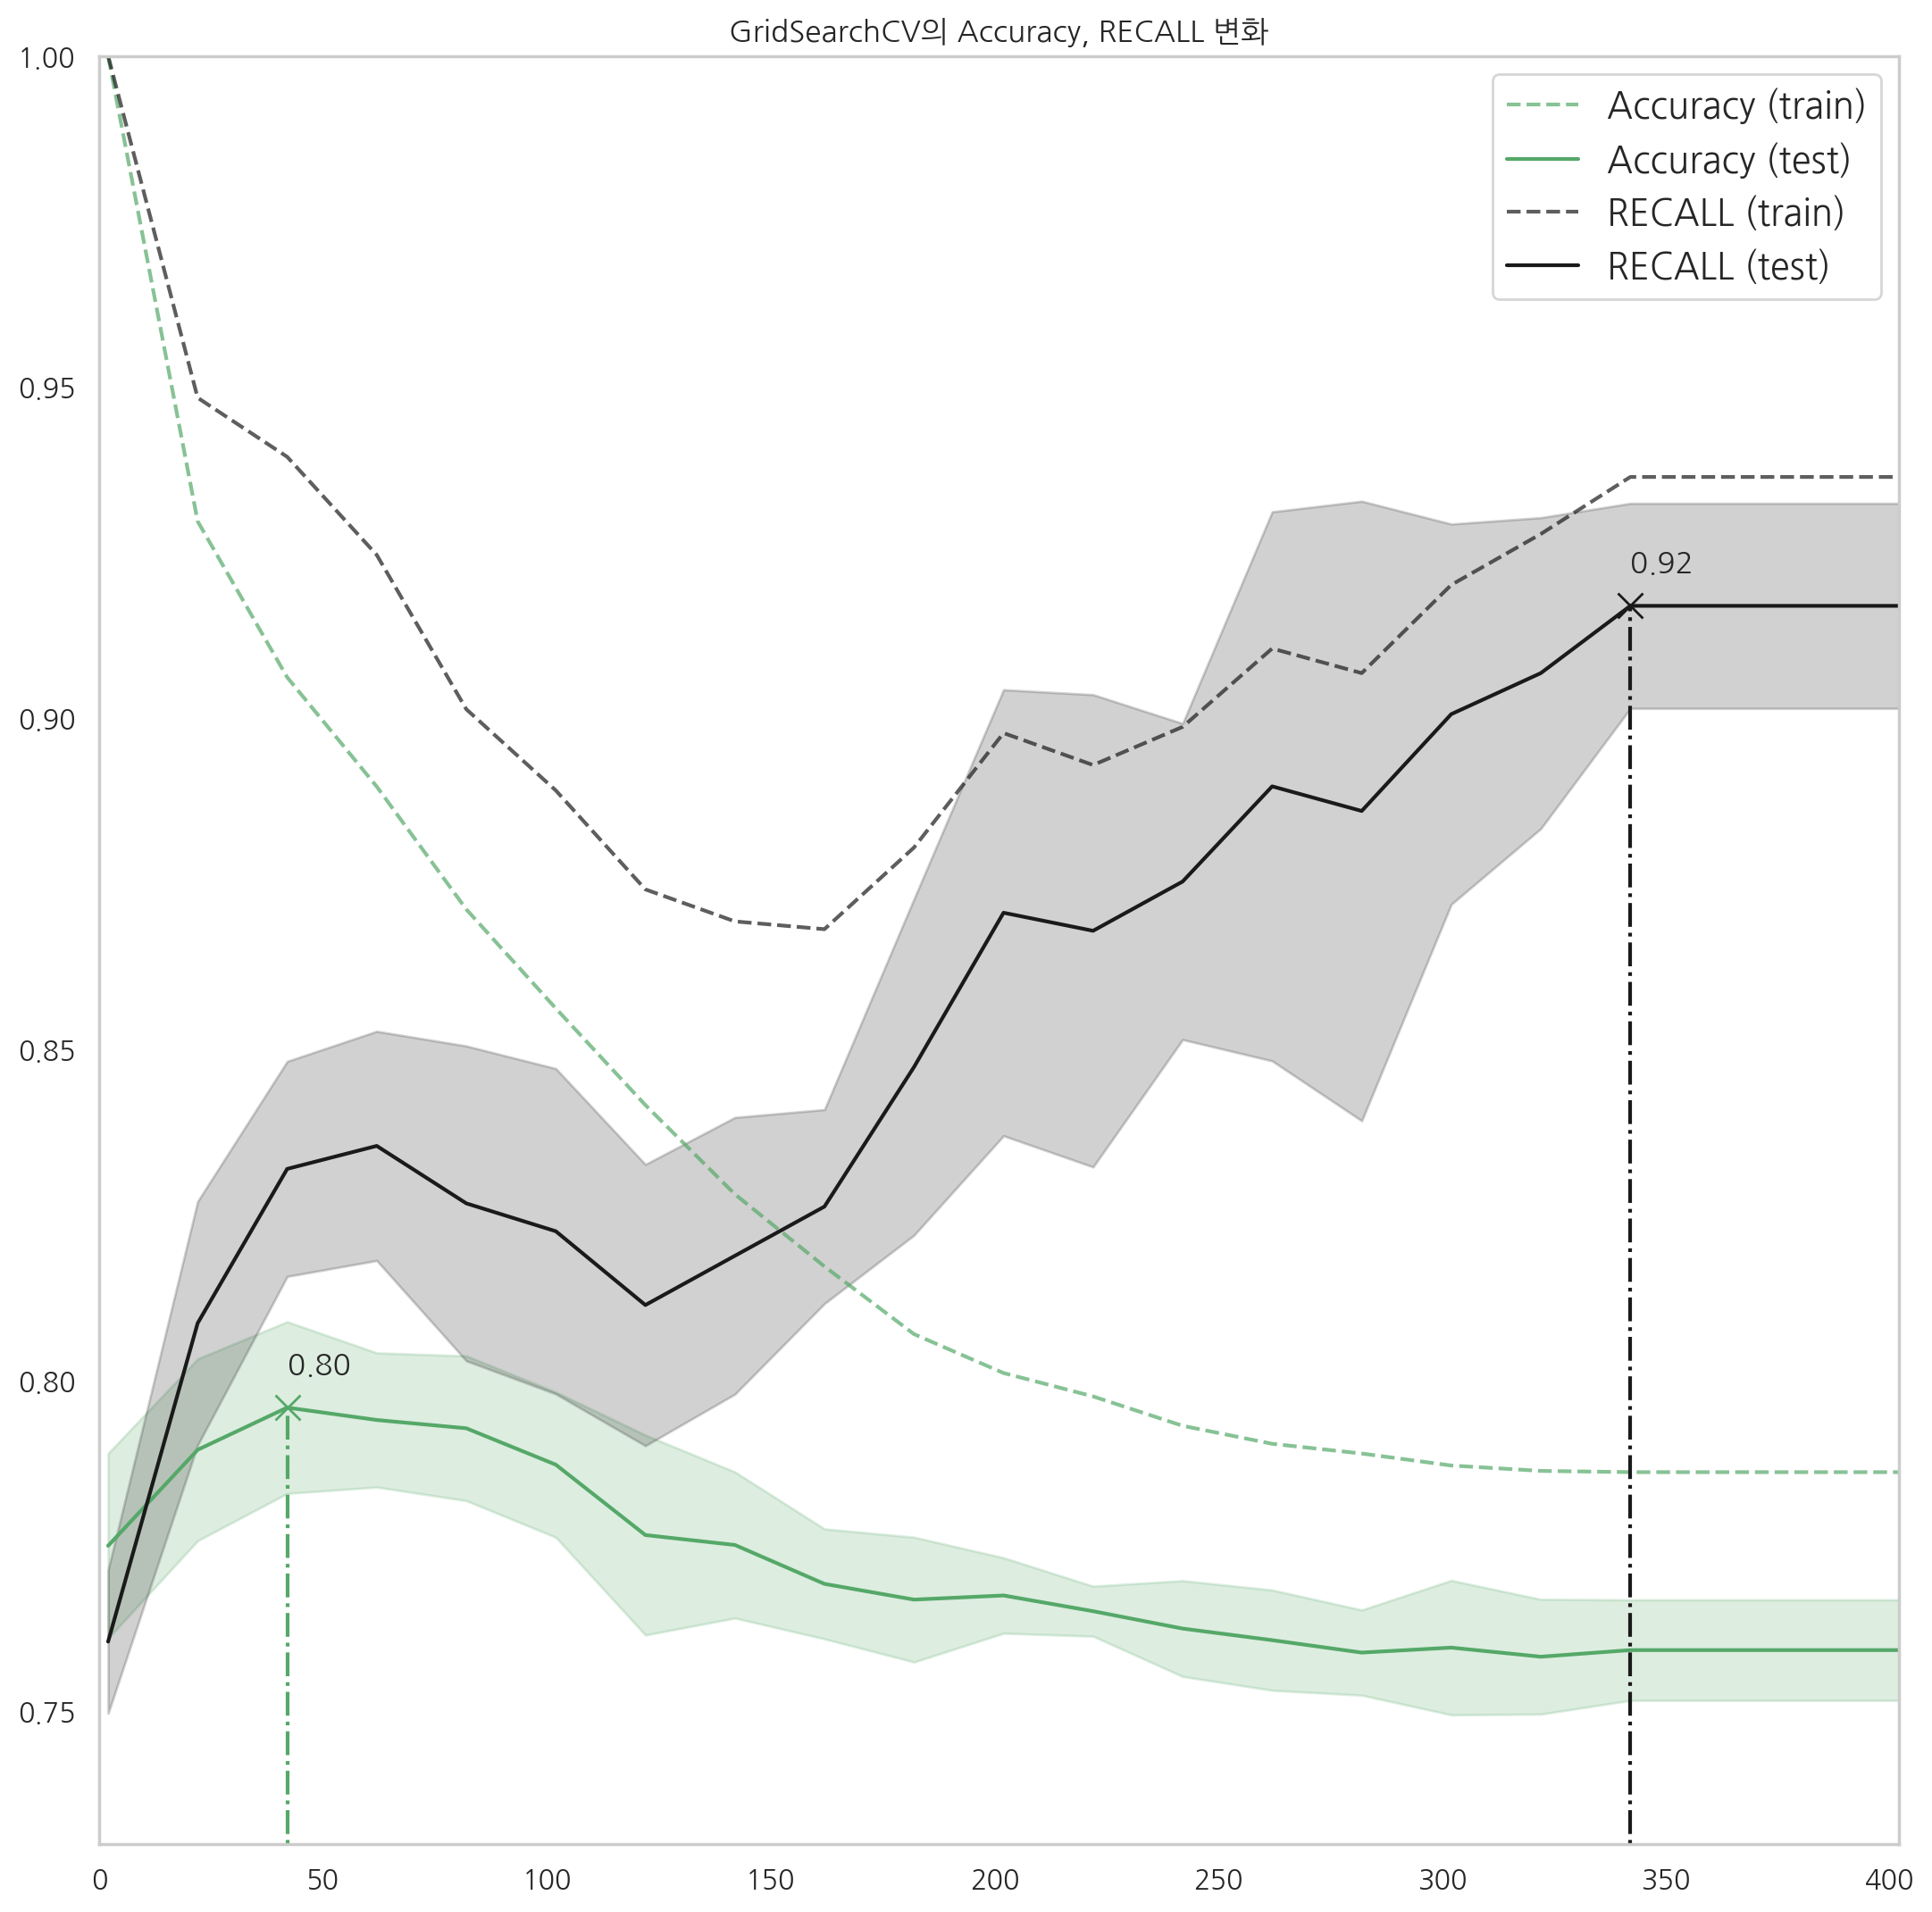

In [139]:
plt.figure(figsize=(13, 13))
ax = plt.gca()

for scorer, color in zip(sorted(scoring), ["g", "k"]) : 
    for sample, style in (("train", "--"), ("test", "-")) : 
        sample_score_mean = results["mean_%s_%s" % (sample, scorer)]
        sample_score_std = results["std_%s_%s" % (sample, scorer)]
        
        ax.fill_between(
            X_axis,
            sample_score_mean - sample_score_std,
            sample_score_mean + sample_score_std,
            color=color,
            linestyle=style,
            alpha=0.2 if sample == "test" else 0.0)
        ax.plot(
            X_axis,
            sample_score_mean,
            color=color,
            linestyle=style,
            alpha=1.0 if sample == "test" else 0.7,
            label="%s (%s)" % (scorer, sample))
        
        best_index = np.nonzero(results["rank_test_%s" % (scorer)]==1)[0][0]
        best_score = results["mean_test_%s" % (scorer)][best_index]
    
    ax.plot(
        [X_axis[best_index]] * 2,
        [0, best_score],
        marker="x",
        color=color,
        linestyle="-.",
        ms=10)
    ax.annotate("%0.2f" % best_score, (X_axis[best_index], best_score + 0.005))

plt.xlim(0, 402)
plt.ylim(0.73, 1.0)
plt.legend(loc="best", fontsize="large")
plt.grid(False)
plt.title("GridSearchCV의 Accuracy, RECALL 변화")
plt.show() ;         

## Nested vs Non-Nested cv test
- Nested CV (중첩 CV) 는 하이퍼파라미터 튜닝이 필요한 모델에 사용 된다.
   - GridSearchCV()를 그냥 사용할 떄와 다시한번 cross_val_score에 사용할 때의 차이
   - non-nested 모델을 사용하는 경우 과적합이 발생할 수 있다.

In [147]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.svm import SVC

In [148]:
iris = load_iris()
X = iris.data
y = iris.target

In [149]:
num_trials = 30
non_nested_scores = np.zeros(num_trials)
nested_scores = np.zeros(num_trials)

In [150]:
non_nested_scores[:5]

array([0., 0., 0., 0., 0.])

In [151]:
nested_scores[:5]

array([0., 0., 0., 0., 0.])

In [163]:
p_grid = {"C": [1, 10, 100], "gamma": [0.01, 0.1]}
svm = SVC(kernel="rbf")

for i in range(num_trials) : 
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    
    # non-nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv)
    clf.fit(X, y)
    non_nested_scores[i] = clf.best_score_
    
    # nested CV scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv)
    nested_score = cross_val_score(clf, X, y, cv=outer_cv)
    nested_scores[i] = nested_score.mean()
    
    score_difference = non_nested_scores - nested_scores
    
print("avg diff of {:.6f} with std. dev. of {:.6f}.".format(
    score_difference.mean(), score_difference.std())
     )

avg diff of 0.007581 with std. dev. of 0.007833.


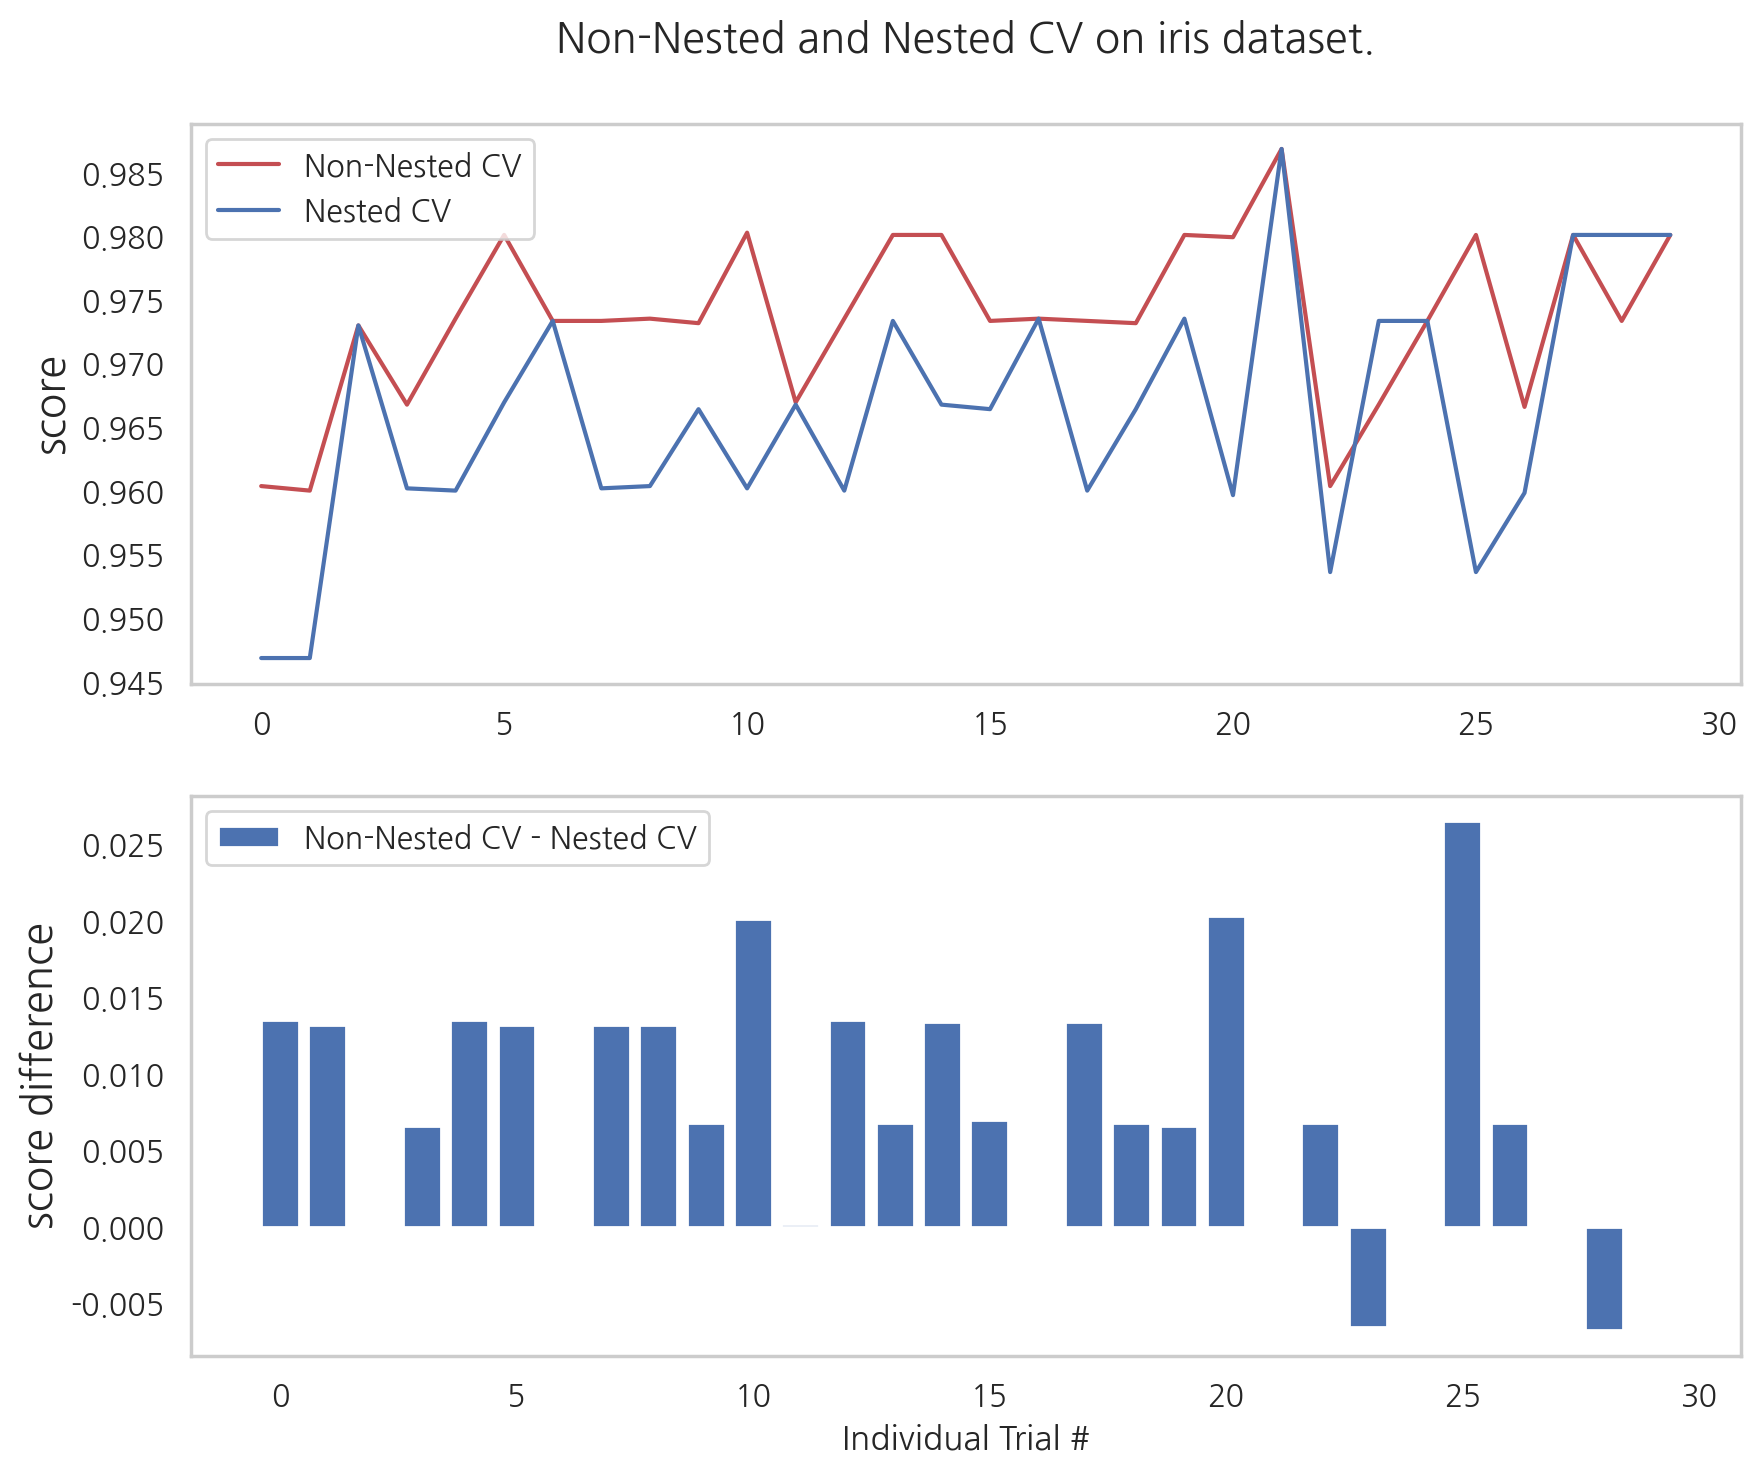

In [162]:
plt.figure(figsize=(10, 8))

plt.subplot(211)
# plot 을 변수에 저장하고 legend에서 이 변수를 그대로 사용
(non_nested_scores_line, ) = plt.plot(non_nested_scores, color="r")
(nested_line, ) = plt.plot(nested_scores, color="b")
plt.ylabel("score", fontsize=15)
plt.legend(
    [non_nested_scores_line, nested_line],
    ["Non-Nested CV", "Nested CV"],
    loc="upper left"
)
plt.title("Non-Nested and Nested CV on iris dataset.",
          x=0.5, 
          y=1.1,
          fontsize=15
)
plt.grid(False)

plt.subplot(212)
# plot을 변수에 저장하고 이 변수를 legend에서 그대로 사용
difference_plot = plt.bar(range(num_trials), score_difference)
plt.xlabel("Individual Trial #")
plt.ylabel("score difference", fontsize=15)
plt.legend(
    [difference_plot],
    ["Non-Nested CV - Nested CV"],
    loc="upper left"
)
plt.grid(False)
plt.show() ; 

## PCA를 사용한 모델 복잡성의 균형과 CV score
- PCA의 n_components를 최소화하면서 정확도 1의 표준편차 내에서 적절한 정확도를 찾는다.

In [100]:
from sklearn.datasets import load_digits

In [101]:
X, y = load_digits(return_X_y=True)

X.shape, y.shape

((1797, 64), (1797,))

In [104]:
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [122]:
def lower_bound(cv_results) : 
    
    # 표준편차 계산 : best score - std score
    best_score_idx = np.argmax(cv_results["mean_test_score"])
    
    return (
        cv_results["mean_test_score"][best_score_idx] \
        - cv_results["std_test_score"][best_score_idx]
    )

In [132]:
def best_low_complexity(cv_results) : 
    
    # 표준편차 계산
    threshold = lower_bound(cv_results)
    # 0이 아닌 것의 인덱스를 array 객체로 반환 : np.nonzero()는 flat하지 않음
    candidate_idx = np.flatnonzero(cv_results["mean_test_score"] >= threshold)
    # 표준편차보다 큰 score에 해당하는 것중 가장 작은 n_comp
    best_pca = candidate_idx[
        cv_results["param_pca__n_components"][candidate_idx].argmin()
    ]
    
    return best_pca

In [188]:
%%time

pipe = Pipeline([
    ("pca", PCA(random_state=42)),
    ("clf", LinearSVC(random_state=42, C=0.01, dual="auto"))
])
p_grid = {"pca__n_components": [i for i in range(6, 15) if (i %2 == 0)]}
gs = GridSearchCV(
    estimator=pipe, 
    param_grid=p_grid, 
    scoring="accuracy",
    n_jobs=1,
    refit=best_low_complexity,
    cv=10)
gs.fit(X, y)

CPU times: total: 4.61 s
Wall time: 1.31 s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                       ('clf',
                                        LinearSVC(C=0.01, dual='auto',
                                                  random_state=42))]),
             n_jobs=1, param_grid={'pca__n_components': [6, 8, 10, 12, 14]},
             refit=<function best_low_complexity at 0x000001AEA4095BD0>,
             scoring='accuracy')

In [210]:
pd.DataFrame(gs.cv_results_)[["param_pca__n_components", "mean_test_score", 
                             "std_test_score", "rank_test_score"]]

,param_pca__n_components,mean_test_score,std_test_score,rank_test_score
0,6,0.774603,0.036048,5
1,8,0.845323,0.043501,4
2,10,0.878132,0.037875,3
3,12,0.901462,0.040131,2
4,14,0.910934,0.038587,1


### lower_bound 함수와 best_low_complexity 함수
- 가장 큰 점수의 표준편차를 구하고
- 이 표준편차보다 큰 점수를 모두 찾아서 인덱스를 반환한다.
- 이 인덱스에 해당하는 n_comp들 중에서 가장 작은 것의 인덱스를 다시 반환한다.
- 다시 이 인덱스에 해당하는 점수를 찾는다. 
- 즉 좋은 모델의 기준으로 가장 큰 점수의 표준편차를 설정하고, 이 값보다 큰 점수들 중 가장 작은 PCA n_compoenet와 이에 해당하는 점수를 찾는 것

In [200]:
temp_thr = lower_bound(gs.cv_results_)
temp_thr

0.8723472134756614

In [203]:
bigger_score_temp_thr = np.flatnonzero(gs.cv_results_["mean_test_score"] >= temp_thr)
bigger_score_temp_thr

array([2, 3, 4], dtype=int64)

In [208]:
lowest_n_comp = gs.cv_results_["param_pca__n_components"]\
                              [bigger_score_temp_thr].argmin()
lowest_n_comp

0

In [220]:
print(
    "표준편자 보다 큰 값중 가장 안정적인 pca에 해당하는 점수의 인덱스 : %.f\n"
    "GCV의 refit 파라미터로 설정한 best_low_complexity 함수의 반환값 : %.f" 
    % (bigger_score_temp_thr[lowest_n_comp], gs.best_index_))

표준편자 보다 큰 값중 가장 안정적인 pca에 해당하는 점수의 인덱스 : 2
GCV의 refit 파라미터로 설정한 best_low_complexity 함수의 반환값 : 2


the best index : 2
the n_comp selected : 10
the corresponding acc : 0.878


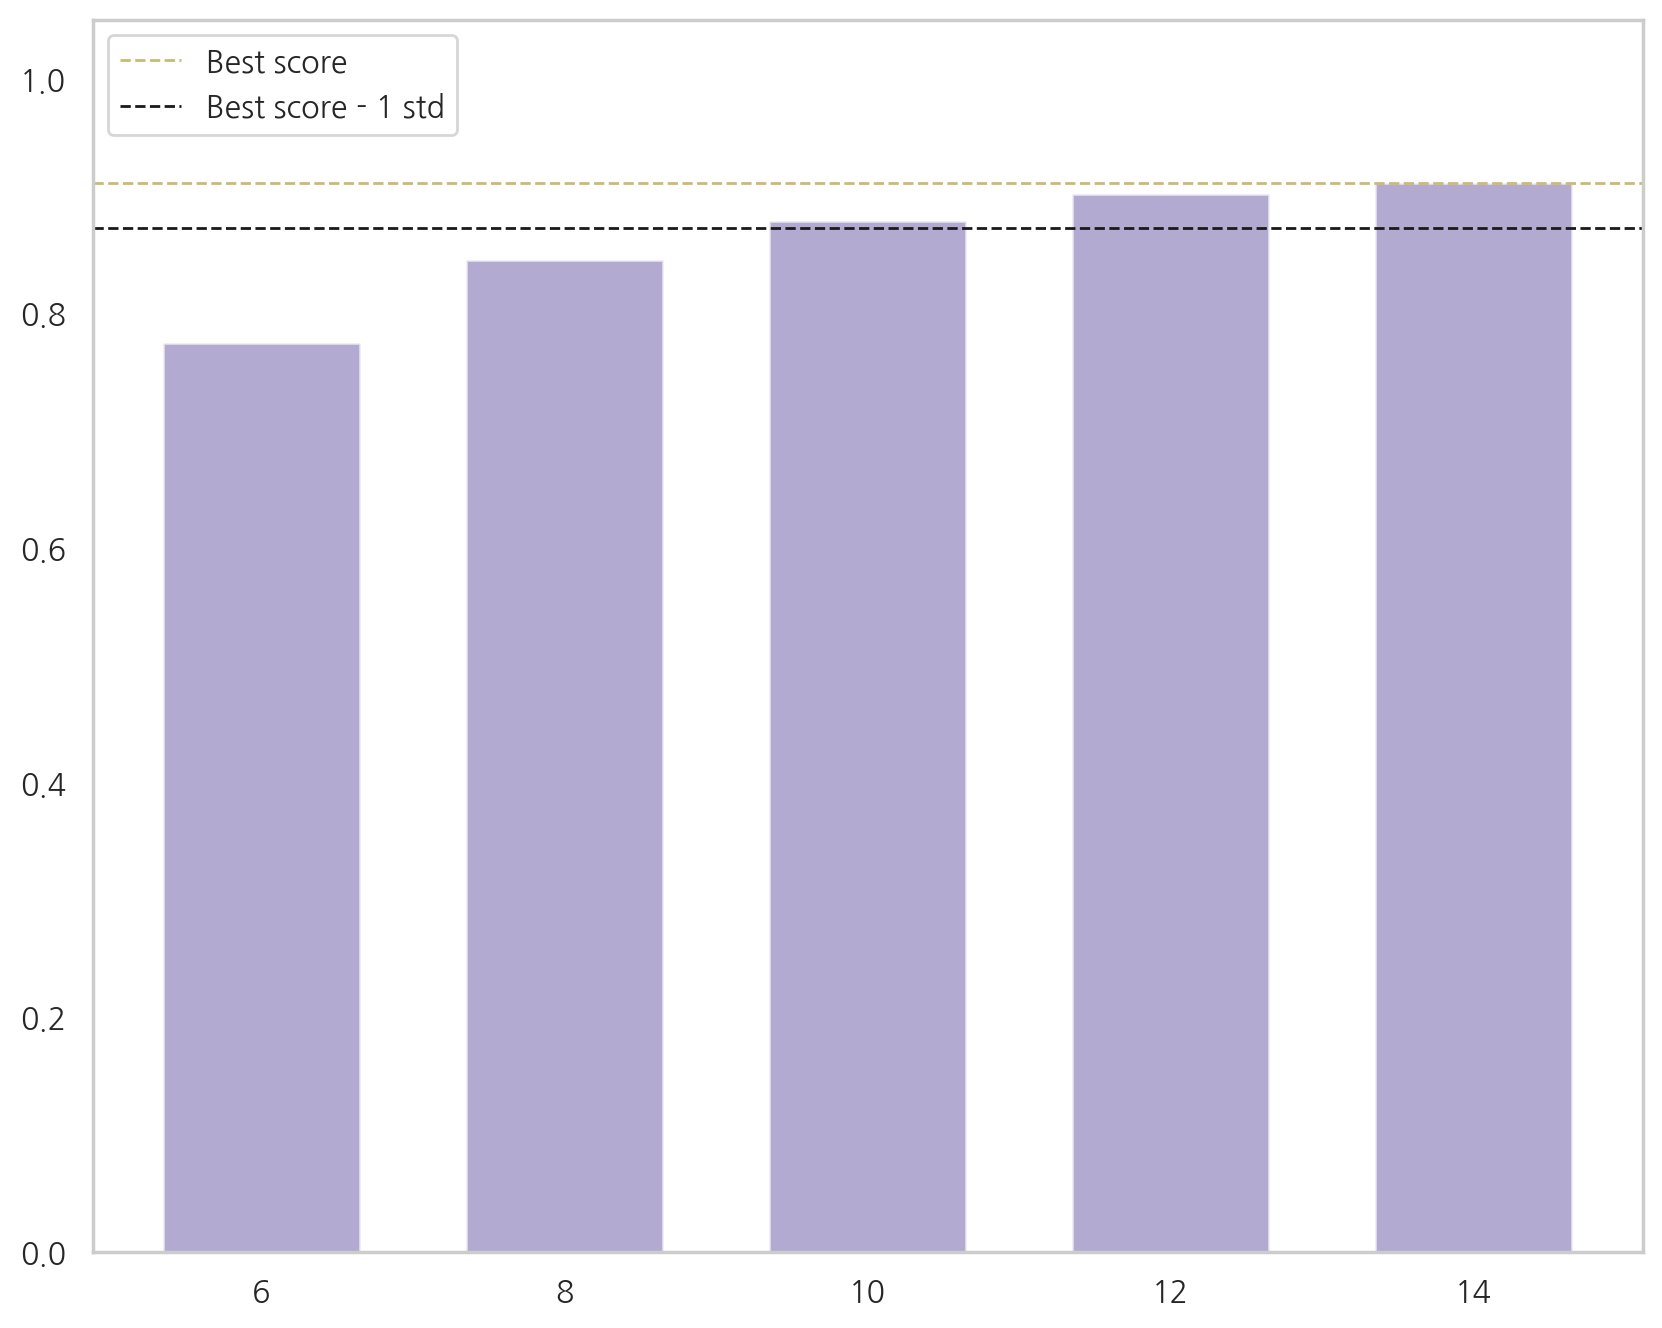

In [211]:
n_comp = gs.cv_results_["param_pca__n_components"]
test_scores = gs.cv_results_["mean_test_score"]

lower = lower_bound(gs.cv_results_)

plt.figure(figsize=(10, 8))
plt.bar(n_comp,  test_scores, width=1.3, color="m", alpha=0.6)
plt.axhline(np.max(test_scores), linestyle="--", color="y", label="Best score", lw=1)
plt.axhline(lower, linestyle="--", color="k", label="Best score - 1 std", lw=1)
plt.xticks(n_comp.tolist())
plt.ylim(0, 1.05)
plt.legend(loc="upper left")
plt.grid(False)

# refit=best_low_complexity
best_index_ = gs.best_index_
print(f"the best index : {best_index_}")
print(f"the n_comp selected : {n_comp[best_index_]}")
print(f"the corresponding acc : {gs.cv_results_['mean_test_score'][best_index_]:.3f}")

plt.show() ; 

In [1]:
from sklearn.datasets import load_digits
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [56]:
X, y = load_digits(return_X_y=True)

In [57]:
def low_bound(cv_results) : 
    
    best_idx = cv_results["mean_test_score"].argmax()
    return cv_results["mean_test_score"][best_idx] - cv_results["std_test_score"][best_idx]

def best_low_complexity(cv_results) : 
    
    thr = low_bound(cv_results)
    candidates = np.flatnonzero(cv_results["mean_test_score"] >= thr)
    n_comp_idx = cv_results["param_pca__n_components"][candidates].argmin()
    best_score_idx = candidates[n_comp_idx]
    
    return best_score_idx
    
pipe = Pipeline([
    ("pca", PCA(random_state=42)),
    ("clf", LinearSVC(random_state=42))
])
p_grid = {
    "pca__n_components": [n for n in range(1, 30) if n %2 == 0]}
gs = GridSearchCV(estimator=pipe, param_grid=p_grid, refit=best_low_complexity, scoring="accuracy", cv=10)
gs.fit(X, y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                       ('clf', LinearSVC(random_state=42))]),
             param_grid={'pca__n_components': [2, 4, 6, 8, 10, 12, 14, 16, 18,
                                               20, 22, 24, 26, 28]},
             refit=<function best_low_complexity at 0x00000107EEAE3E20>,
             scoring='accuracy')

In [58]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.272012,0.012715,0.000892,0.000298,2,{'pca__n_components': 2},0.466667,0.461111,0.505556,0.522222,0.516667,0.438889,0.494444,0.497207,0.463687,0.435754,0.480220,0.029552,14
1,0.222800,0.010313,0.000796,0.000398,4,{'pca__n_components': 4},0.716667,0.783333,0.761111,0.694444,0.744444,0.644444,0.800000,0.720670,0.670391,0.715084,0.725059,0.046153,13
2,0.199999,0.009033,0.000801,0.000600,6,{'pca__n_components': 6},0.722222,0.833333,0.738889,0.772222,0.838889,0.727778,0.833333,0.798883,0.703911,0.821229,0.779069,0.049810,12
3,0.170600,0.009892,0.000800,0.000400,8,{'pca__n_components': 8},0.816667,0.866667,0.805556,0.827778,0.816667,0.838889,0.905556,0.910615,0.804469,0.821229,0.841409,0.037438,11
4,0.164299,0.009664,0.001152,0.000321,10,{'pca__n_components': 10},0.894444,0.933333,0.866667,0.850000,0.883333,0.894444,0.905556,0.905028,0.826816,0.888268,0.884789,0.028806,10
5,0.165300,0.014652,0.001100,0.000300,12,{'pca__n_components': 12},0.861111,0.922222,0.911111,0.888889,0.877778,0.944444,0.944444,0.932961,0.837989,0.877095,0.899804,0.034862,8
6,0.171099,0.011844,0.000801,0.000401,14,{'pca__n_components': 14},0.900000,0.950000,0.922222,0.855556,0.866667,0.905556,0.938889,0.927374,0.810056,0.871508,0.894783,0.041234,9
7,0.182500,0.008992,0.000900,0.000539,16,{'pca__n_components': 16},0.916667,0.938889,0.855556,0.905556,0.872222,0.938889,0.950000,0.938547,0.821229,0.893855,0.903141,0.040262,7
8,0.192799,0.011618,0.000902,0.000301,18,{'pca__n_components': 18},0.905556,0.955556,0.855556,0.922222,0.872222,0.950000,0.977778,0.938547,0.854749,0.921788,0.915397,0.040675,4
9,0.197796,0.012930,0.001002,0.000448,20,{'pca__n_components': 20},0.888889,0.961111,0.900000,0.888889,0.894444,0.950000,0.972222,0.927374,0.843575,0.905028,0.913153,0.037359,6


### best score 막대 그래프

In [6]:
%matplotlib inline

In [94]:
# best score 막대만 따로 그리기 위한 scores 편집

def modify_best_scores(cv_results, best_index) : 
    
    mean_scores = cv_results["mean_test_score"].copy()
    mean_scores[best_index] = 0
    
    only_best_score = cv_results["mean_test_score"].copy()
    non_best_index = np.arange(len(n_comp)) != best_index
    only_best_score[non_best_index] = 0
    
    return mean_scores, only_best_score

best scores index : 5
best scores : 0.900
best PCA component : 12


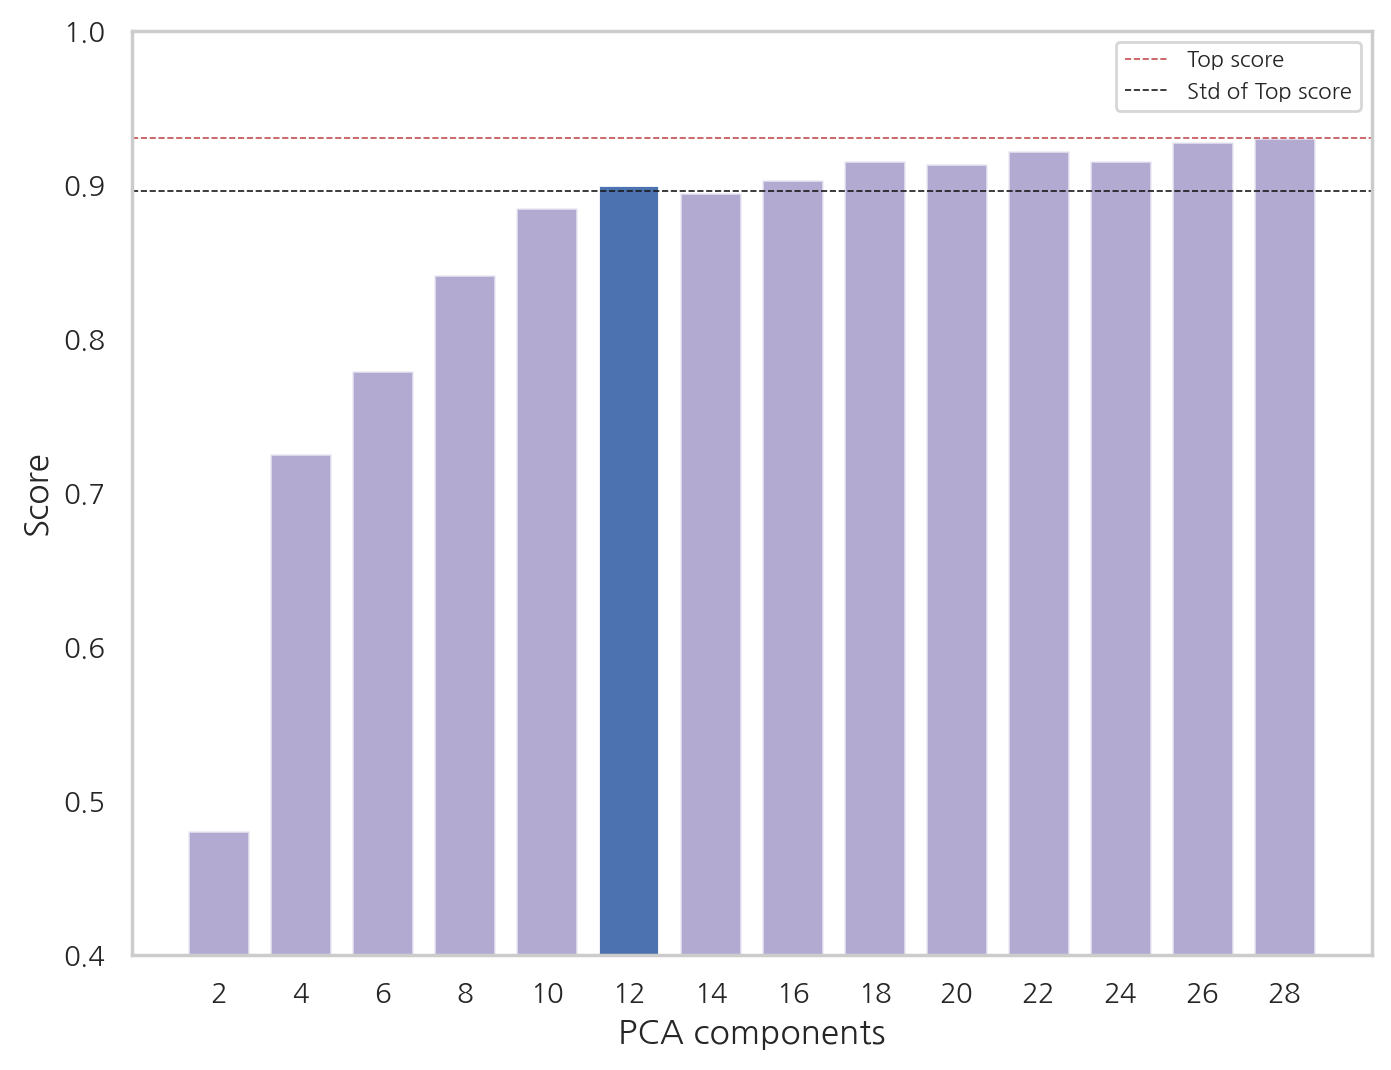

In [95]:
n_comp = gs.cv_results_["param_pca__n_components"]
low_boundary = low_bound(gs.cv_results_)
best_index = gs.best_index_
mean_scores, only_best_score = modify_best_scores(gs.cv_results_, best_index)

plt.figure(figsize=(8, 6))
plt.bar(n_comp, mean_scores, color="m", alpha=0.6, width=1.5)
plt.bar(n_comp, only_best_score, color="b", width=1.5)
plt.axhline(mean_scores.max(), linestyle="--", lw=0.6, color="r", label="Top score")
plt.axhline(low_boundary, linestyle="--", lw=0.6, color="k", label="Std of Top score")
plt.xticks(range(1, 30), [i if i %2 == 0 else "" for i in range(1, 30)], fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("PCA components")
plt.ylabel("Score")
plt.ylim(0.4, 1.0)
plt.grid(False)
plt.legend(loc="best", fontsize=8)

print("best scores index : %.f" % (best_index))
print("best scores : %.3f" % (only_best_score[best_index]))
print("best PCA component : %.f" % (n_comp[best_index]))

plt.show() ; 